# load library

In [1]:
source("r/jupyter_common.R")
source("r/identify_cell_types.R")
source("r/plot_sc_clusters.R")



In [2]:
# data structure
suppressPackageStartupMessages(library(data.table))

# single cell analysis
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ArchR))

# visualization
suppressPackageStartupMessages(library(Vennerable))


# read scATAC-seq

In [3]:
dir_atac <- "/home/hkim77/francolab.w/sc-atac-seq/male-bc/run-20220725"
fname_atac <- sprintf("%s/output_male-bc/rds/male-bc_archrproj_obj_final.rds", dir_atac)

atac <- readRDS(fname_atac)


# venn

In [4]:
dir_venn <- sprintf("%s/output_p2g_male-bc/rds", dir_atac)
fname_venn <- sprintf("%s/venn_chippeakanno_overlaps_of_enhancer_peaks.rds", dir_venn)

res <- readRDS(fname_venn)


In [5]:
res$vennCounts <- res$vennCounts[2:4,]
attr(res$vennCounts, 'dimnames')[[2]] <- c("Cancer", "HMEC", "Counts")


In [6]:
# https://support.bioconductor.org/p/67429/
venn_cnt2venn <- function(venn_cnt){
 n <- which(colnames(venn_cnt)=="Counts") - 1
 SetNames=colnames(venn_cnt)[1:n]
 Weight=venn_cnt[,"Counts"]
 names(Weight) <- apply(venn_cnt[,1:n], 1, paste, collapse="")
 Venn(SetNames=SetNames, Weight=Weight)
 }

v <- venn_cnt2venn(res$vennCounts)


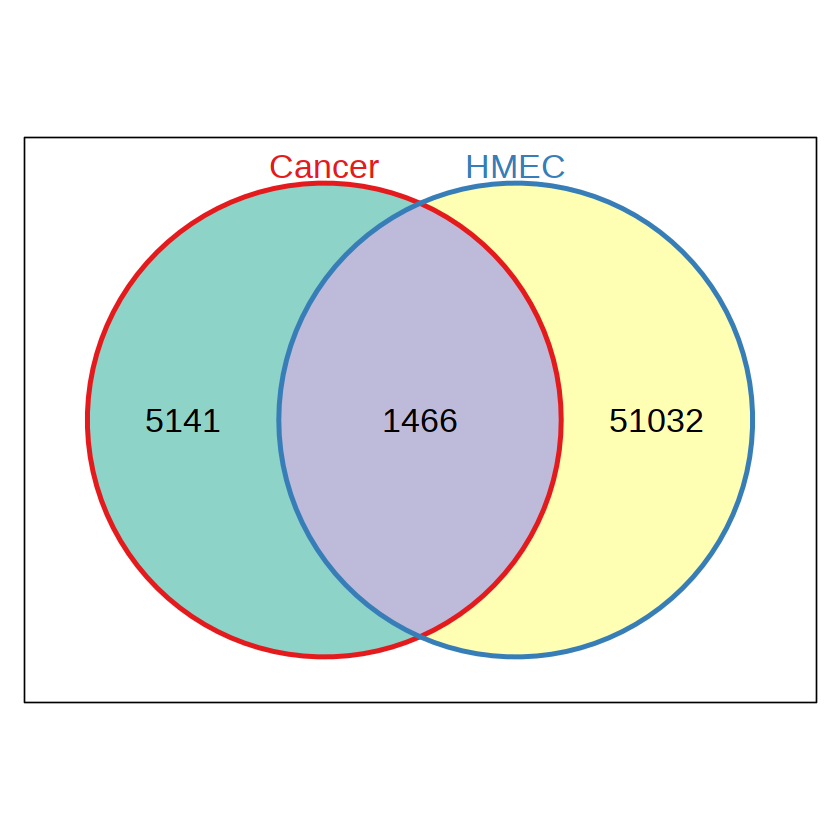

In [7]:
plot(v, doWeights = FALSE, type = "circles")


In [8]:
cairo_pdf(sprintf("pdf/venn_cancer_peaks_overlap.pdf"), width=6, height=6)
plot(v, doWeights = FALSE, type = "circles")
dev.off()


png 
  2

# reference

https://jianhong.github.io/workshop2020/articles/ChIPpeakAnno.html

